<!---
Notas de clase Métodos Computacionales
Por 
Óscar Antonio Restrepo Gutiérrez
--->

# Solución numérica de integrales

“*I had learned to do integrals by various methods shown in a book that my high school physics teacher Mr. Bader had given me. [It] showed how to differentiate parameters under the integral sign — it’s a certain operation. It turns out that’s not taught very much in the universities; they don’t emphasize it. But I caught on how to use that method, and I used that one damn tool again and again. [If] guys at MIT or Princeton had trouble doing a certain integral, [then] I come along and try differentiating under the integral sign, and often it worked. So I got a great reputation for doing integrals, only because my box of tools was different from everybody else’s, and they had tried all their tools on it before giving the problem to me.*”<br> Book: Surely you’re Joking, Mr. Feynman! ([Ver más acá.](https://www.cantorsparadise.com/richard-feynmans-integral-trick-e7afae85e25c))

No todas las integrales se pueden resolver de manera analítica, es más en la mayoría de problemas de física las integrales se tienen que resolver por métodos numéricos, los métodos de integración numérica estudiados en este módulo son: 

  1) [Método de cuadratura (Riemann)](#cuadratura_Riemann).<br>
  2) [Método trapezoidal](#Método_trapezoidal).<br>
  3) [Método de Simpson](#Método_de_Simpson).<br>
  4) [Métodos de la cuadratura gaussiana.](#cuadratura_gaussiana)<br>
  5) [Método de Romberg.](#Método_de_Romberg)<br>
  6) [Integrales impropias.](#Integrales_impropias)<br>
  7) [Método de von Neumann para integrales](#Método_de_von_Neumann) (Monte Carlo).<br>
  8) [Integrales múltiples](#Integrales_múltiples) (teorema del valor medio y Monte Carlo).<br>
  9) [Material Complementario](#MATERIAL_COMPLEMENTARIO1).

(Nota: Ejecutar las dos últimas celdas para poder generar los gráficos del Notebook)

<a id='cuadratura_Riemann'></a>
 ## 1) Cuadratura de Riemann
 La forma más simple de realizar la integral es usar rectángulos para calcular el área bajo la curva,
 
 |<img src="Riemann.png" alt="Drawing" style="width: 500px;"/>|
|:--:| 
| *Figura: Integral por método cuadratura*|

 
 más exactamente, si $f(x)$ es una función que está definida en el intervalo $[a,b]$ tal que $a = x_0 < x_1 < \dots < x_n = b$, entonces de la definición de integrar 
de Riemann se puede calcular el área bajo la curva como,

$$I = \sum_{i=1}^n f(x_i)h = \sum_{i=1}^{n} A_i$$

donde $A_i=f(x_i)h=$ "*área del rectángulo en el subintervalo* $[x_{i-1},x_{i}]$" y $n =$ "*número de subintervalos o rectángulos*", (note que la suma también podría ir de  $i=0,...,n-1$). Además  

$$h = (b-a)/n$$
$$x_i = a + ih.$$
   
La siguiente rutina calcula la integral de $\cos(x)$ en el intervalo $[0,\pi/2]$:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Si la entrada es una función definida en [a,b], con n subintervalos.
def Cuadratura(f,a,b,n):
   h = (b - a)/n
   S = 0
   for i in range(1,n+1): # Note que también da si range(n)=0,..,n-1
     S += f(a + i*h)*h    # I = A1 + A2 + ... + An
   return S    

# Ejemplo1:
Cuadratura(lambda x: np.cos(x),0, np.pi/2, 1000) # valor exacto 1.0

0.9992143962198352

In [ ]:
# Si la entrada son dos arreglos de datos (yi,xi)    
def Cuadratura2(y,x):
   S = 0
   for i in range(1,len(x)):
     S += y[i]*(x[i] - x[i-1])
   return S    

# Ejemplo2:
xi = np.linspace(0, np.pi/2, 1001) # debe ser n+1 (tamaño del array)
yi = np.cos(xi)
Cuadratura2(yi,xi)

0.9992143962198362

<a id='Método_trapezoidal'></a>
# 2) Método trapezoidal
 En el método anterior el error es muy grande puesto que se consideran rectángulos para calcular el área en cada subintervalo, un mejor método es considerar trapezoides para la integración.
 
 |<img src="Trapezoidal.png" alt="Drawing" style="width: 500px;"/>|
|:--:| 
| *Figura: Integral por método trapezoidal*|

 
 Para integrar $f(x)$ en el intervalo $[a,b]$, la función se aproxima a una linea recta en cada subintervalo,         $[x_i,x_{i+1}]$, y se calcula su área como *base por altura*, la altura se calcula por el valor promedio $(f(x_i) + f(x_{i-1}))/2$,
entonces, el área del trapezoide en el intervalo $[x_i,x_{x+1}]$ es

   $$A_i = \frac{f(x_i) + f(x_{i-1})}{2}h.$$
             
Si se suman todas las áreas $A_i$ se tiene una aproximación de la integral:
  
 \begin{align} I =&\, \sum_{i=1}^{n} A_i\\
                 =&\, A_1 + A_2 + \cdots + A_n,\\
                 =&\, \frac{f(x_0) + f(x_{1})}{2}h + \frac{f(x_1) + f(x_{2})}{2}h +\cdots+\frac{f(x_{n-2}) + f(x_{n-1})}{2}h+\frac{f(x_{n-1}) + f(x_{n})}{2}h,\\
               I =&\, h/2\left[f(a) + 2\sum_{i=1}^{n-1}f(x_i) + f(b)\right],
 \end{align}
 
 o en forma más compacta
 
 $$I = \sum_{i=0}^{n} f(x_i)w(x_i),$$
 
 donde los $w(x_i)$ se conocen como pesos, en este caso
 
 $$w(x_i) = \{h/2,h,... ,h,h/2\},$$ 
 
 y
 
 $$\sum_{i=0}^{n} w(x_i) = nh.$$
 
En general ([ver material complementario](#MATERIAL_COMPLEMENTARIO1)),
 
 $$\boxed{ \int_a^b f(x)dx = \frac{h}{2}\left[f(a) + 2\sum_{i=1}^{n-1}f(x_i) + f(b)\right]-\frac{b − a}{12}h^2f''(\xi).}$$
 
 Donde el último término es el error y $\xi$ es un número desconocido tal que $\xi ∈ [a,b]$. 

In [ ]:
def Trapezoidal(f,a,b,n):
   h = (b - a)/n
   S = (f(a) + f(b))/2.  # inicialise con f0w0 + f[n-1]*w[n-1]
   for i in range(1,n):# suma en 1, ..., n-2 
     S = S + f(a + i*h)  # I = f1w1 + f2w2 + ... + fn-2*wn-2
   return S*h # suma último elemento fn-1*wn-1

# Ejemplo3:
Trapezoidal(lambda x: np.cos(x),0, np.pi/2, 1000) # valor exacto 1.0

0.9999997943832332

In [ ]:
# Si la entrada son dos arreglos de datos (yi,xi)    
def Trapezoidal2(y,x):
   n = len(x) - 1
   S = y[0]*(x[1] - x[0])/2.          # inicialize con f0w0
   for i in range(1,n-1):             # suma en 1, ..., n-2 
     S += y[i]*(x[i+1] - x[i])        # I = f1w1 + f2w2 + ... + fn-2*wn-2
   return S + y[n]*(x[n] - x[n-1])/2. # suma último elemento fn-1*wn-1

# Ejemplo4:
xi = np.linspace(0, np.pi/2, 1001)    # debe ser n+1 (tamaño del array)
yi = np.cos(xi)
Trapezoidal2(yi,xi)

0.9999973269831469

<a id='Método_de_Simpson'></a>
# 3) Método de Simpson

|<img src="Simpson.png" alt="Drawing" style="width: 500px;"/>|
|:--:| 
| *Figura: Integral por método de Simpson.*|

 En este método se remplaza la función por una parabola 
            
 $$f(x) = ax^2 + bx + c,$$
            
 que pase por los puntos, $x_{i-1},x_i,x_{i+1}$, en el intervalo $[x_{i-1},x_{i+1}]$ y se calcula el área $A_i$ bajo esta curva, para ello, la parabola se integra en el intervalo $[x_{i-1},x_{i+1}]$. Veamos una deducción euristica ([ver material complementario](#MATERIAL_COMPLEMENTARIO1) para demostración con polinomios de lagrange), consideremos la integral  
 
 $$\int_{-1}^1(ax^2 + bx + c)dx=\frac{2}{3}a+2c,$$
 
 ahora, si notamos que 
 
 $$f(-1) = a-b+c, \quad  f(0) = c, \quad  f(1) = a+b+c $$
 
 entonces despejando $a,b$ y $c$
 
 $$a=\frac{f(1)+f(-1)}{2}-f(0), \quad b=\frac{f(1)-f(-1)}{2},\quad c=f(0), $$
 
 ahora remplazamos $a,b$ y $c$ en la integral anterior, esto nos da
 
 $$\int_{-1}^1(ax^2 + bx + c)dx= \frac{f(-1)}{3} + \frac{4f(0)}{3} + \frac{f(1)}{3},$$
 
 ahora si reescalamos, es decir cambiamos $(-1 \rightarrow x_i-h)$, $(0 \rightarrow x_i)$,  $(1 \rightarrow x_i+h)$ y multiplicamos por $h$ para recobrar las unidades de área, encontramos que
 
 $$A_i = \int_{x_i-h}^{x_i+h}(ax^2 + bx + c)dx = \left(f(x_{i-1}) + 4f(x_i) + f(x_{i+1})\right)\frac{h}{3},$$ 

 para $i = 1,...,n/2$, pues $A_i$ cubre dos intervalos (note que $n$ debe ser par). 


Si se suman todas $n/2$ áreas $A_i$ se tiene una aproximación de la integral:
  
\begin{align} I =&\, \sum_{i=1}^{n/2} A_i\\
                 =&\, A_1 + A_2 + \cdots + A_{n/2},\\
                 =&\, \left(f(x_{0}) + 4f(x_1) + f(x_{2})\right)\frac{h}{3} + \left(f(x_{2}) + 4f(x_3) + f(x_{4})\right)\frac{h}{3} +\cdots\\
                 =&\frac{h}{3}f(x_{0})+\frac{4h}{3}f(x_{1})+\frac{2h}{3}f(x_{2})+\frac{4h}{3}f(x_{3})+\cdots+\frac{4h}{3}f(x_{n-1})+\frac{h}{3}f(x_{n})
 \end{align}

si se suma términos pares e impares por separado lo anterior da

$$I =\,\frac{h}{3}\left[f(a) + 2\sum_{i=1}^{(n/2)-1}f(x_{2i}) + 4\sum_{i=1}^{n/2}f(x_{2i-1}) + f(b)\right],$$

o en forma más compacta

 $$I = \sum_{i=0}^{n} f(x_i)w(x_i),$$
 
 donde los $w(x_i)$ se conocen como pesos en este caso noten que 

$$w(x_i) = \left\{\frac{h}{3},\frac{4h}{3},\frac{2h}{3},\frac{4h}{3},\cdots,\frac{4h}{3},\frac{h}{3}\right\},$$ 

y

 $$\sum_{i=0}^{n} w(x_i) = nh,$$
 
 En general, la regla de simpson es
 
$$\boxed{
 \int_a^b f(x)dx = \frac{h}{3}\left[f(a) + 2\sum_{i=1}^{(n/2)-1}f(x_{2i}) + 4\sum_{i=1}^{n/2}f(x_{2i-1}) + f(b)\right]-\frac{b − a}{180}h^4f^{(4)}(\xi)
,}$$
 
 donde $\xi ∈ (a,b).$

In [ ]:
# Integral en [a,b] n debe ser entero positivo, pues requiere 2 intervalos/paso.


def Simpson(f,a,b,n):
   h = (b - a)/n
   S0 = f(a) + f(b)
   S1 = 0 
   S2 = 0 
   for i in range(1,n):  # suma en 1, ..., n-1 
     if (i%2==0): 
        S2 += f(a + i*h) # suma de pares
     else:
        S1 += f(a + i*h) # suma de impares
   return (S0 + 2*S2 + 4*S1)*h/3 

# Ejemplo5:
Simpson(lambda x: np.cos(x),0, np.pi/2, 1000) # valor exacto 1.0

1.000000000000033

In [ ]:
# Alternativa (solo se suma hasta n/2 - 1):
import numpy as np
def Simpson(f,a,b,n):
    h = (b - a)/n
    S0 = f(a) + 4*f(a + (n-1)*h) + f(b)
    S1 = 0
    S2 = 0
    for i in range(1,n//2):    # suma de 1, ..., n/2 - 1 
        S2 += f(a + 2*i*h )    # suma de pares
        S1 += f(a + (2*i-1)*h) # suma de impares
    return (S0 + 2*S2 + 4*S1)*h/3
 
# Ejemplo5:
Simpson(lambda x: np.cos(x),0, np.pi/2, 1000) # valor exacto 1.0

1.000000000000033

In [ ]:
# Si la entrada son dos arreglos de datos (xi,yi)    
def Simpson2(x,y):
   n = len(x) - 1
   hn = x[n] - x[n-1]
   h0 = x[1] - x[0]
   S0 = y[0]*h0 + y[n]*hn # inicialice
   S1 = 0
   S2 = 0
   for i in range(1,n):   # suma en 1, ..., n-1
     hi = x[i+1] - x[i]
     if (i%2==0):         
        S2 += y[i]*hi     # suma de f(2xi) si i es par
     else:
        S1 += y[i]*hi     # suma de f(2x[i-1]) si i es impar
   return (S0 + 2*S2 + 4*S1)/3 

# Ejemplo6:
xi = np.linspace(0, np.pi/2, 1001) # debe ser n+1 (tamaño del array)
yi = np.cos(xi)
Simpson2(xi,yi)

1.0000000000000338

### Error de redondeo y estabilidad en reglas de Simpson y Trapezoidal
 El error de redondeo $e(h)$ no incrementa si aumenta $n$: para esto considere
        $f(x_i) = g(x_i) + e_i$, para cada $i = 0, 1, . . . , n,$, donde $g(x_i)$ es una aproximación de $f(x_i)$,
 en general se puede demostrar que $e(h) ≤ (b − a)\epsilon,$ siendo $\epsilon$ un error limite para el error individual en 
 cada paso, esto indica que el procedimiento es estable para $h$ tendiendo a cero.

<a id='cuadratura_gaussiana'></a>
# 4) Método de cuadratura gaussiana
En los métodos anteriores los espaciamientos en el intervalo $[a,b]$ eran todos iguales ($h$ constante), una mejor aproximación es asignar pesos a cada valor de la función para valores específicos $x_i$, pues estos puntos contribuyen más a la suma, así se requerirá evaluar la suma en menos puntos.
El método de [cuadratura gaussiana](https://en.wikipedia.org/wiki/Gaussian_quadrature)
es basado en esta idea, ósea,
$$\int_{-1}^1 f(x)\,dx \approx \sum_{i=1}^n w_i f(x_i).$$

Se puede demostrar que los valores $x_i$, para $i=1,...n$ son los ceros de los [polinomios de legendre](https://en.wikipedia.org/wiki/Legendre_polynomials) (ver [material complementario](#Polinomios_de_legendre) al final) y los pesos $w'_i$ son dados por,

$$w_i = \frac{2}{\left( 1-x_i^2 \right) [P'_n(x_i)]^2},$$
donde $P'_n(x_i)$ son las derivadas de los polinomios de legendre.  
Este método de integración se conoce como método de *Gauss-Legendre*.
La integral se puede generalizar para cualquier intervalo $[a,b]$ usando una simple transformación lineal $y=mx+c$, del intervalo $[-1,1]\rightarrow[a,b]$, lo cual da que $m=(b-a)/2$ y $c=(a+b)/2$, al remplazar en la integral tenemos:

$$\int_a^b f(x)\,dx = \frac{b-a}{2} \int_{-1}^1 f\left(\frac{b-a}{2}x + \frac{a+b}{2}\right)\,dx,$$

así la integral es aproximadamente igual a

$$\int_a^b f(x)\,dx \approx \frac{b-a}{2} \sum_{i=1}^n w_i\,f\left(\frac{b-a}{2}x_i + \frac{a+b}{2}\right).$$

Si se usan $n$ puntos se puede demostrar que el error es proporcional a la $2n$-esima derivada ósea,

$$\epsilon=\frac{(b-a)^{2n+1} (n!)^4}{(2n+1)[(2n)!]^3} f^{(2n)} (\xi),$$

con $a < \xi < b$. 

En general, si definimos $W_i=\frac{b-a}{2}w_i$, $y_i=\frac{b-a}{2}x_i + \frac{a+b}{2}$, la integral en el intervalo $[a,b]$ es

$$\int_a^b f(x)\,dx = \sum_{i=1}^n W_i\,f(y_i) + \epsilon.$$

Note que de esta expresión se concluye que para polinomios de grado $n$ (o menores) la solución a la integral es exacta, es decir, el error es cero. 
<!---
Nota: si la integración es en los intervalos $[-\infty,\infty]$, $[a,\infty]$, etc, entonces hay que hacer otras transformaciones para cambiar los límites de integración al intervalo $[-1,1]$, pero en estos casos es mejor usar otros métodos de cuadratura para la integración como [Gauss–Hermite](https://en.wikipedia.org/wiki/Gauss%E2%80%93Hermite_quadrature) o [Gauss–Laguerre](https://en.wikipedia.org/wiki/Gauss%E2%80%93Laguerre_quadrature), las implementaciones se dejan como [tarea](#cuadratura_problemas).
--->
<!---
(https://en.wikipedia.org/wiki/Laguerre_polynomials).
--->

El siguiente código calcula la integral con el método de gauss legendre, para esto llama la función gauss que es la encargada de calcular los ceros $x_i$ y los pesos $w_i$ de los polinomios de legendre, note que la función "gauss" usa el método de newton-rapson, $t_{k+1,i}=t_{k,i}-P_n(t_{k,i})/P'_n(t_{k,i})$, para aproximar cada cero ($i=1,...,n$ denota los ceros y $k$ las iteraciones en newton-rapson). Por simetría solo calcula la mitad y se usa como aproximación unicial para cada cero $i$, la expresión
$t_{0,i} = \cos\left(\frac{\pi(i - 1/4)}{n + 1/2}\right)$.
Las derivadas de los polinomios de legendre, $P'_n(x_i)$ (necesarias para calcular los pesos $w_i$) se calculan usando la relación de recurrencia dada al [final del capítulo](#Polinomios_de_legendre). 
<!---
Lista de tipos de integrales que se pueden resolver con cuadratura gaussiana: 
<a id='Tabla_cuadratura_gaussiana'></a>
$$
\begin{eqnarray}
&&\hline &\hline &\hline &\hline &\hline \\[-2pt]
&& Integral   & Nombre   && Integral  & Nombre  \\
&&\hline &\hline &\hline &\hline &\hline \\
&&\int_{-1}^1 f(x)\,dx & \hbox{Gauss–Legendre} &&  \int_{-1}^1 \frac{f(x)}{\sqrt{1-x^2}}\,dx & \hbox{Gauss–Chebyshev}\\
&&\int_{-\infty}^\infty e^{-x^2}f(x)\,dx & \hbox{Gauss–Hermite} && \int_{0}^\infty e^{-x}f(x)\,dx & \hbox{Gauss–Laguerre}         \\
&&\int_{0}^\infty \frac{e^{-x}}{\sqrt{x}}f(x)\,dx& \hbox{Associated Gauss–Laguerre}&& \int _{0}^{\infty }x^{\alpha }e^{-x}f(x)\,dx&\hbox{Generalized Gauss–Laguerre}\\
&&\hline &\hline &\hline &\hline &\hline
\end{eqnarray}
$$
--->

In [ ]:
def gauss(n,job, a,b,x,w, eps = 3.E-15 ):
    """
    -------------------------------------------------------------------------
    # Metodo de Cuadratura Gaussiana (Gauss–Legendre quadratura) usando n   #
    # puntos en el intervalo [a,b], x y w arreglos con los puntos xi (ceros #
    # del polinomio de Legendre P_n(x)) y pesos wi, eps es el error deseado,# 
    # job es:                                                               #
    #        0 para integración en [a, b]                                   #
    #        1 para integración en [0, b]                                   #
    #        2 para integración en [a, inf]                                 #
    -------------------------------------------------------------------------
    """    
    m = (n + 1)//2 # Por simetría, solo se calcula la mitad de las raíces.
    for i in range(1, m + 1): # Bucle para encontrar las raíces y los pesos.
        t = np.cos(np.pi*(i - 0.25)/(n + 0.5) ) # Suposición inicial de la 
        t1 = 1                                  # i-esima raíz de orden n.
        while( (np.abs(t - t1) ) >= eps):       # Newton iteration para
            p1 = 1. ; p2 = 0.                   # encontrar la raíz i-esima.
            for j in range(1, n + 1):
                p3 = p2                         # Relación de recurrencia de 
                p2 = p1                         # P_n(x).
                p1 = ( (2.*j - 1)*t*p2 - (j - 1.)*p3)/j
                                                # Relación de recurrencia de 
            pp = n*(t*p1 - p2)/(t*t - 1.)       # P'_n(x): Derivada de P_n(x).
            t1 = t
            t  = t1 - p1/pp                     # xi = x - P_n(x)/P'_n(x).

        x[i - 1] = - t      # Guardar la raíz encontrada y
        x[n - i] = t        # por simetría esta es la otra raíz no calculada.
        w[i - 1] = 2./( (1. - t*t)*pp*pp)       # Guardar peso.
        w[n - i] = w[i - 1]                     # Guardar, usando simetría.
        # print(" x[i - 1]", x[i - 1] , " w " , w[n - i])
    if (job == 0):
        for i in range(0, n):
            x[i] = x[i]*(b - a)/2. + (b + a)/2. # Transformación de [-1,1] al
            w[i] = w[i]*(b - a)/2.              # intervalo [a, b].
            
    if (job == 1):                              # Escala a (0, b) con 50% puntos 
        for i in range(0, n):                   # dentro de (0, ab/(a + b))
            xi = x[i]
            x[i] = a*b*(1. + xi)/(b + a - (b - a)*xi)
            w[i] = w[i]*2.*a*b*b/( (b + a - (b - a)*xi)**2. )
            
    if (job == 2):                              # Escala a (a, inf) con 50% 
        for i in range(0, n):                   # dentro de (a, b + 2a)
            xi = x[i]
            x[i] = (b*xi + b + a + a)/(1. - xi)
            w[i] = w[i]*2.*(a + b)/( (1. - xi)**2. ) 

In [ ]:
# **** función que calcula la integral llamando Gauss() para obtener los wi, xi ****       
def Integral_Gauss(f, a, b, n):
    """
       Integral de f(x) en [a,b] usando el metodo de Gauss con n puntos. 
    """
    w = np.zeros(n)           # contendrá los ceros de los pols. de Legendre
    x = np.zeros(n)           # contendrá los pesos w para la integración

    gauss(n, 0, a, b, x, w)   # Retorna puntos xi y wi

    return sum(f(x)*w)        # Calcule integral    


#ejemplo7:
Integral_Gauss(lambda x: np.cos(x), 0., np.pi/2, 6)

0.999999999999947

<a id='Método_de_Romberg'></a>
# 5) Método de Romberg
En los métodos anteriores no es posible calcular la integral con una precisión deseada, el método de Romberg permite definir un $\epsilon$ para calcular la integral (a diferencia de las derivadas numéricas, $\epsilon$ solo está limitado por la precisión de la máquina), además este método es casi tan rápido como el método de cuadratura gaussiana (el algoritmo se obtiene al aplicar la fórmula de recurrencia de [extrapolación de Richardson](https://en.wikipedia.org/wiki/Richardson_extrapolation)). 
 Considere que la integral
 $$I=\int_a^bf(x)dx$$
 tiene un valor aproximado $A(h)$ calculado a partir del método trapezoidal, por lo tanto si se incluye el error en la forma de serie de potencias de $h$
 
 $$I = A(h) + K_1h^2 +K_2h^4 + K_3h^6...$$
 
 Suponga que para reducir el error se calcula $A$ pero a cada $h/2$
 
 $$I = A\left(\frac{h}{2}\right) + K_1\frac{h^2}{4} +K_2\frac{h^4}{16} ...$$
 
 Si se multiplica esta ecuación por $4$ y se resta a la primera (así eliminando el término de $h^4$) se obtiene 
 
 $$I =\left[\frac{4}{3}A\left(\frac{h}{2}\right)-\frac{1}{3}A\left(h\right)\right] + K_2\frac{h^4}{4} ...$$

la expresión entre corchetes cuadrados tiene un error del orden de $O(h^4)$ y por lo tanto es más próxima al valor verdadero $I$. Esto se repite de manera iterativa (ver complemento para la [deducción del método de Romberg](#Deducción_del_método_de_Romberg)).

La implementación es:

In [ ]:
def Romberg(f, a, b,kmax = 30, eps = 1e-9, p = False):
    """
    -------------------------------------------------------------------------
    # Método adaptativo de Romberg.                                         #
    # Integra la función f(x) en [a,b] con precisión eps                    #
    # kmax es el máximo número de iteraciones                               #
    -------------------------------------------------------------------------
    """ 
    r1 = np.zeros(kmax+1)
    r2 = np.zeros(kmax+1)

    h = b-a 
    n = 1
    r1[0] = 0.5*h*(f(a) + f(b)) # aproximación inicial
    for k in range(1,kmax+1):   # step halving loop
        sumf = 0.
        for i in range(1,n+1): sumf += f(a+(i-0.5)*h)
        r2[0] = 0.5*(r1[0] + h*sumf) # trapezoidal formula
        y = 1.
        for j in range(1,k+1):  # incrementar orden de quadratura
            y *= 4
            r2[j] = (y*r2[j-1] - r1[j-1])/(y-1) # nueva aproximación

        if (k > 1): # verificar convergencia
            if (np.fabs(r2[k]-r1[k-1]) <= eps*np.fabs(r2[k])): break
            if (np.fabs(r2[k]) <= eps and np.fabs(r2[k]) <= np.fabs(r2[k]-r1[k-1])):break
        
        h *= 0.5; n *= 2 # reduzca a la mitad el paso de integración
        for j in range(0,k+1): r1[j] = r2[j] # corra la lineas de la tabla
        if p == True: print(k, r2[k])
    if (k >= kmax):
        print("Romberg: max. numero de iteraciones excedido! kmax=",kmax)
        k -= 1
    
    return r2[k]

#Ejemplo
#Romberg(lambda x: np.cos(x), 0., np.pi/2.,eps=1e-14)
#Romberg(lambda x: np.cos(x), 0., np.pi/2.,kmax=10)
Romberg(lambda x: np.cos(x), 0., np.pi/2.,p=True)

1 1.0022798774922104
2 0.9999915654729927
3 1.0000000081440208
4 0.9999999999980169


1.0000000000000002

**Tarea**: hacer ejercicio  6.2.5 del libro de [Landau & Paéz](https://www.eidos.ic.i.u-tokyo.ac.jp/~tau/lecture/computational_physics/docs/computational_physics.pdf#page=140) (página 140).

Romberg: max. numero de iteraciones excedido! kmax= 2
Romberg: max. numero de iteraciones excedido! kmax= 4


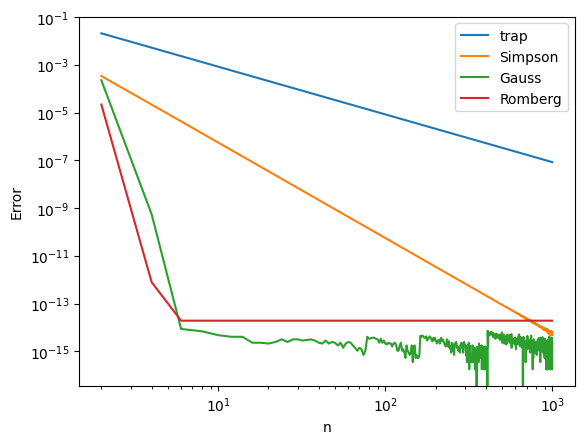

In [ ]:
# Solución: 
# Gráfico comparación del error de la integral
# de  f(x) = exp(-x) en [0,1]
# para 4 métodos numéricos diferentes

nmax = 1000
N = 1 - np.exp(-1)
f = lambda t:np.exp(-t)

etrap=[]
eSimpson=[]
eGauss=[]
eRomberg=[]

x = np.arange(2,nmax,2) # se hace para n par (pues Simpson pide n par)
for n in x:
    etrap.append(np.abs((Trapezoidal(f,0 ,1,n) - N)/N) )
    eSimpson.append((np.abs(Simpson(f,0 ,1,n) - N)/N) )
    eGauss.append((np.abs(Integral_Gauss(f,0 ,1,n) - N)/N) )
    eRomberg.append((np.abs(Romberg(f,0 ,1,n) - N)/N) )
    
plt.loglog(x,etrap,label='trap')   
plt.loglog(x,eSimpson,label='Simpson') 
plt.loglog(x,eGauss,label='Gauss') 
plt.loglog(x,eRomberg,label='Romberg')

plt.xlabel('n')
plt.ylabel('Error')
plt.legend()

**Ejemplo**: Encontrar un estimativo del mejor número de pasos $n$ en la integral de Gauss en el intervalo $[0,1]$ (ver sección [*6.2.3 Integration Error*, del libro de Landau & Páez](https://www.eidos.ic.i.u-tokyo.ac.jp/~tau/lecture/computational_physics/docs/computational_physics.pdf#page=137)). 

Solución: Sabemos que para una función $f$ el error relativo es dado por,

$$\epsilon_{re} = \frac{\epsilon}{f},$$

con el error de Gauss dado por,

$$\epsilon=\frac{(b-a)^{2n+1} (n!)^4}{(2n+1)[(2n)!]^3} f^{(2n)} (\xi),$$

sea $\epsilon_m\approx 10^{-16}$ el error de trabajar con 64 bits.
Ahora, si se supone que el error relativo después de $n$ pasos es aproximadamente,

$$\hbox{Error} = \sqrt{n}\epsilon_m,$$

entonces se debe encontrar el valor de $n$ que minimiza el error, note que esto ocurre cuando ambos errores son aproximadamente iguales, es decir $\epsilon_{re}\approx\hbox{Error}$, osea,

$$\sqrt{n}\epsilon_m\approx\frac{(n!)^4}{(2n+1)[(2n)!]^3},$$

donde suponemos que $(b-a)=1$ y $f^{(2n)}/f\approx 1$. Desgraciadamente no se puede encontrar $n$ de manera fácil debido al factorial, por lo que la expresión anterior se iguala a cero para usar métodos de raices,

$$g(n)=0=\sqrt{n}\epsilon_m - \frac{(n!)^4}{(2n+1)[(2n)!]^3}.$$

Una manera rápida de encontar $n$ es buscar el valor de $n$ donde el signo de  la función $g(n)$ pasa de positivo a negativo,
según esto el mejor $n$ para un $\epsilon_m=10^{-16}$ está entre $5$ y $6$ lo cuál está de acuerdo con la gráfica del error mostrada anteriormente, así el el error en la integración de Gauss es aproximadamente, $\sqrt{n}\epsilon_m \approx 2\times10^{-16}$, veamos: 

In [ ]:
# Estimación del error para la integración de Gauss en el intervalo [0,1]
fact = lambda x: np.math.factorial(x)      
g = lambda n: n**.5*1e-16 - (fact(n))**4./(2.*n+1.)/(fact(2.*n))**3.                                                   

for n in range(10):  
    print(n, g(n)) 

TypeError: ignored

**Tarea**: en el ejemplo anterior para la integral gaussiana por simplicidad se supuso $b-a=1$, también se puede suponer $b-a=2$, pues el intervalo de integración es $[-1,1]$, repita el ejercicio con esta supocición y compare.

**Tarea**: usar el mismo procedimiento anterior para encontrar que el número de pasos es del orden de $2.5\times 10^6$ en el método Trapezoidal y del orden de $10000$ para el método Simpson.

<a id='Integrales_impropias'></a>
# 6) Integrales impropias
Son todas aquellas que presentan infinitos en el intervalo de integración (o en los valores límites $a,b$). 
## Divergencia en la función 
Consideremos la función $f(x)=g(x)/(x-a)^p$, la cual diverge pues $f(a)=\infty$ (ver figura):

|<img src="f_impropia.png" alt="Drawing" style="width: 400px;"/>|
|:--:| 
| *Figura: función impropia: $f(a)=\infty$.*|

No obstante su integral converge si $0<p<1$. Es decir, las integrales de funciones de este tipo con singularidad $a$ en el intervalo $[a,b]$, donde $g(x)$ es continua en $[a,b]$,

$$I = \int_a^b\frac{g(x)}{(x-a)^p}\,dx\quad\hbox{con}\quad 0<p<1,$$

convergen y tienen solución aproximada por,

$$I = \int_a^b\frac{g(x)-P_4(x)}{(x-a)^p}\,dx+\int_a^b\frac{P_4(x)}{(x-a)^p}\,dx,$$
donde por series taylor,

$$P_4(x) = g(a)+g'(a)(x-a)+\frac{g''(a)}{2!}(x-a)^2+\frac{g'''(a)}{3!}(x-a)^3+\frac{g^{(4)}(a)}{4!}(x-a)^4,$$

la segunda integral es el término dominante (da la mayor contribución) y se puede calcular como, 

$$
\begin{eqnarray}
\int_a^b\frac{P_4(x)}{(x-a)^p}\,dx
&=&\,\int_a^b\sum_{k=0}^4 \frac{g^{(k)}(a)}{k!}(x-a)^{k-p}\,dx,\\
&=&\,\sum_{k=0}^4 \frac{g^{(k)}(a)}{k!}\int_a^b(x-a)^{k-p}\,dx,\\
&=&\,\sum_{k=0}^4\frac{g^{(k)}(a)}{k!(k+1-p)}(b-a)^{k+1-p},
\end{eqnarray}
$$

la primera integral se puede aproximar con el método de Simpson, si se usa la función,

$$
\begin{align}
  &f(x)=\begin{cases}
    \begin{alignedat}{3}
      \frac{g(x)-P_4(x)}{(x-a)^p},& \quad\hbox{si}\quad a < x \le b   \\
       0,\quad\quad\quad\quad     &\quad\hbox{si}\quad   x=a, 
    \end{alignedat}
  \end{cases}\\
\end{align}
$$

que evita la indeterminación a $x=a$.
Si la singularidad es en $b$, se hace el cambio de variable $t=-x$ para recuperar la anterior integral, lo cual da,

$$I = \int_{a}^{b}f(x)\,dx= \int_{-b}^{-a}f(-t)\,dt.$$

Si la singularidad es $c$ entre $[a,b]$, entonces se parte la integral en dos, una en $[a,c]$ y otra en $[c,b]$. 

## Limites infinitos 
Si hay límites infinitos se hace el cambio de variable $t=1/x$ (esto en adición a los los métodos de cuadratura gaussiana para ciertas integrales impropias; ver [tabla](#Tabla_cuadratura_gaussiana)). Pero ¿Cómo resuelve una integral de la forma, $\int_0^\infty f(x)\,dx$? note que no se puede usar $t=\frac{1}{x}.$
Respuesta, simplemente se parte en dos intervalos $[0, 1]$ y $[1, \infty]$.

**Ejemplo**: considere la integral,

$$I = \int_1^\infty x^{-3/2}\hbox{sen}\left(\frac{1}{x}\right)\,dx,$$

si se hace el cambio de variable $t=1/x$ y $dx=-dt/t^2$, entonces da la integral,

$$I = \int_0^1t^{-1/2}\hbox{sen}\,(t)\,dt,$$

con singularidad $t=a=0$.
Para más teoría de Integrales impropias e integrales con límites infinitos leer Burden pagina: 250-255.
también ver la [web](http://nm.mathforcollege.com/topics/textbook_index.html).

Implementación de la anterior integral:

In [ ]:
#Serie taylor con sympy
from sympy import *
init_printing(use_latex='mathjax') # nice print!!!

t = symbols('t')
g = sin(t)
series(g,t,x0=0, n=4)

     3        
    t     ⎛ 4⎞
t - ── + O⎝t ⎠
    6         

In [ ]:
P4 = series(g,t,0,4).removeO() # remover O(h^4)
a=0; b=1; p=1/2 

# -------- primera integral -----------------------
def SimpsonP4(a, b, p, n):
    G = (g - P4)/(t - a)**p     # función simbólica  
    f = lambdify(t, G, 'numpy') # función numérica

    h = (b - a)/n
    S0 = f(b)                # note que f(a) = 0
    S1 = 0 
    S2 = 0 
    for i in range(1,n):     # suma en 1, ..., n-1 
        if (i%2==0): 
            S2 += f(a + i*h) # suma de de f(2xi)
        else:
            S1 += f(a + i*h) # suma de de f(2x[i-1])
    return (S0 + 2*S2 + 4*S1)*h/3 

# --------- segunda integral ----------------------
def Integral_P4(a, b, p, n):
    S = 0
    for k in range(n):
       dy = g.diff(t,k)
       dg = lambdify(t, dy, 'numpy')        
       S += dg(a)*(b-a)**(k+1-p)/(k+1-p)/np.math.factorial(k)
    return S

# ------------ El resultado es la suma: ------------
Integral_P4(a, b, p, 4), SimpsonP4(a, b, p, 16)

In [ ]:
# La Integral_P4(a, b, p, 4) contribuye con el 0.998% del área:
(0.6190476190476191- 0.0014890096885413241)/0.6190476190476191

Note que la aproximación $P_4(x)$ funciona bien si $(x-a)$ es pequeña, lo cual dependerá de la separación entre $a$ y $b$, para garantizar esto otro método es partir la integral dos, la primera en el intervalo $[a,a+h]$, y $g(x)$ se cambia por el $P_4(x)$ y la segunda integral en el intervalo $[a+h,b]$, se usa $f(x)=\frac{g(x)}{(x-a)^p}$. Como veremos en el siguiente código, Simpson no funciona tan bien pues se necesita $n = 10000$ para obtener $0.62053661$ (con precisión de $4\times10^{-8}$) del resultado anterior, ¿por qué? la función tiene grandes variaciones entre $x$ y $x+h$ a medida que se aproxima $x$ al valor $a$ y regla de Simpson no funciona bien en la segunda integral debido a la aproximación con polinomio de grado tres, así, el valor de $h$ se debe elegir de tal manera que su valor sea pequeño pero que la diferencia $|f(x)-f(x+h)|$ no sea muy grande. Pero si se usa Gauss-legendre en la segunda integral esta diferencia ya no es tan importante
de hecho funciona bastante bien, comparemos:

In [ ]:
# Simpson no funciona tan bien pues se necesita n = 10000 para
# obtener 0.62053661 (con precision de 4e-8) del resultado anterior.
# ¿por qué? la función tiene grandes variaciones entre x y x+h 
# a medida que se aproxima x al valor a y Simpson no funciona bien 
# por la aprox del polinomio de grado 3, pero con Gauss funciona 
# muy bien, COMPARE: 
n = 16      # mismo valor usado en caso anterior. 
h = (b-a)/n # mismo h usado en Simpson
fo = lambda x: np.sin(x)/x**.5 # f(x)
IS = Integral_P4(a, a+h, p, 4) + Simpson(fo, a+h, b, n)    
IG = Integral_P4(a, a+h, p, 4) + Integral_Gauss(fo, a+h, b, n) 
# Comparar errores:
0.62053661-IS, 0.62053661-IG

## Integrales impropias por métodos de cuadratura 

El método de la [cuadratura gaussiana](#cuadratura_gaussiana) también se puede usar para resolver integrales impropias si se hacen los mapeos adecuados al intervalo $[-1,1]$, por ejemplo mediante el mapeo, $x=a(1+t)/(1−t)$, tenemos que,

$$
\int_0^{\infty}f(x)\,dx = \int_{-1}^{1}f\left(a\frac{1+t}{1-t}\right)\frac{2a}{(1-t)^2}\,dt,
$$

otra alternativa es $x = a \cot^2(t/2)$ (aunque habría que mapear luego a $[-1,1]$),

$$
\int_0^\infty f(x)\,dx = 2a \int_0^\pi \frac{f[a \cot^2(t/2)]}{[1 - \cos(t)]^2} \text{sen}(t)\,dt. 
$$

En el caso del intevalo $[-\infty,\infty]$, se puede usar el mapeo $x=at/(1−t^2)$, que da,

$$
\int_{-\infty}^{\infty}f(x)\,dx = a\int_{-1}^{1}f\left(a\frac{t}{1-t^2}\right)\frac{1+t^2}{(1-t^2)^2}\,dt.
$$

En todos los casos $a$ es una constante cualquiera que acelera la convergencia, por lo general, $a=1$.
Otra alternativa es la transformación $x = -\ln[(1 + \cos(t))/2]$, para integrales con $e^x$, la cual da,

$$\int_0^\infty e^{-x} g(x)\,dx=\int_0^\pi f(\cos(t))\text{sen}(t) \,dt\quad\hbox{ donde }\quad f(u) = g(-\ln[(1+u)/2])/2.$$

**Tarea**: a) implementar en la rutina `gauss()` estos mapeos y probar el resultado con la integral $\int_{-\infty}^\infty e^{-x^2}\,dx = 2\int_0^\infty e^{-x^2}\,dx=\sqrt{\pi}$.

Si la integración es en los intervalos $[a,\infty]$, $[-\infty,\infty]$,  etc, entonces hay que hacer las  transformaciones anteriores para cambiar los límites de integración al intervalo $[-1,1]$, pero en algunos casos es mejor usar otros métodos de cuadratura para la integración tales como [Gauss–Hermite](https://en.wikipedia.org/wiki/Gauss%E2%80%93Hermite_quadrature) o [Gauss–Laguerre](https://en.wikipedia.org/wiki/Gauss%E2%80%93Laguerre_quadrature), las implementaciones se dejan como [tarea](#cuadratura_problemas).

<!---
Comentario
(https://en.wikipedia.org/wiki/Laguerre_polynomials).
--->

Lista de tipos de integrales que se pueden resolver con cuadratura gaussiana: 
<a id='Tabla_cuadratura_gaussiana'></a>
$$
\begin{eqnarray}
&&\hline &\hline &\hline &\hline &\hline \\[-2pt]
&& Integral   & Nombre   && Integral  & Nombre  \\
&&\hline &\hline &\hline &\hline &\hline \\
&&\int_{-1}^1 f(x)\,dx & \hbox{Gauss–Legendre} &&  \int_{-1}^1 \frac{f(x)}{\sqrt{1-x^2}}\,dx & \hbox{Gauss–Chebyshev}\\
&&\int_{-\infty}^\infty e^{-x^2}f(x)\,dx & \hbox{Gauss–Hermite} && \int_{0}^\infty e^{-x}f(x)\,dx & \hbox{Gauss–Laguerre}         \\
&&\int_{0}^\infty \frac{e^{-x}}{\sqrt{x}}f(x)\,dx& \hbox{Associated Gauss–Laguerre}&& \int _{0}^{\infty }x^{\alpha }e^{-x}f(x)\,dx&\hbox{Generalized Gauss–Laguerre}\\
&&\hline &\hline &\hline &\hline &\hline
\end{eqnarray}
$$

El método de [Clenshaw–Curtis](https://en.wikipedia.org/wiki/Clenshaw%E2%80%93Curtis_quadrature) es otra alternativa a la cuadratura gaussiana.

<a id='Método_de_von_Neumann'></a>
# 7) Método de rechazo de von Neumann para integrales (Monte Carlo)

Suponga que se quiere calcular el área de un círculo, $A_p$, de radio $L$, usando números aleatorios ($A_p$ también podría ser el área de un lago). El *método de rechazo* es un método simple para calcular el área, para ello, 1) se crea un cuadrado de longitud $2L$  que contenga el círculo y, 2) luego se generan $N$ puntos con distribución uniforme dentro del cuadrado, 3) se cuenta cuantos puntos $N_p$ hay dentro del círculo, como los puntos tienen distribución uniforme su densidad es constante, entonces,

$$\rho = \frac{N}{4 L^2}=\frac{N_p}{A_p},$$

así tenemos que,

$$A_{p}=4 \frac{N_p}{N}L^2 \rightarrow \text{Área del círculo/lago}$$

Para esto se deben generar números aleatorios con distribución uniforme, los métodos python para eso son,
```python
# Generar números con distribución uniforme:
np.random.random()              # Generar un solo número en [0,1)
np.random.rand(10)              # Generar 10 números en [0,1)
np.random.uniform(-1,1)         # Generar un número aleatorio en [-1,1] 
np.random.uniform(-5,5,size=10) # Generar 10 números en [-5,5]
```

**Ejemplo**: Calcular el área de un circulo de radio uno, usando monte carlo (debe dar $\pi$), el código es:

In [ ]:
# Calcular el área de un circulo de radio uno, usando monte carlo.

N=1000000
Np = 0
for i in range(N):
   x = np.random.uniform(-1,1)
   y = np.random.uniform(-1,1)
   # note que también se puede usar, dado que solo se consideran los cuadrados.   
   #  x = np.random.random()
   #  y = np.random.random()    
   if (x**2.+y**2<1): Np +=1
   
Area = Np/N*4. # el area del rectángulo es 4.
Area

## Método de rechazo de von Neumann
El método anterior se puede usar para calcular la integral de una función positiva en el intervalo $[a,b]$ como el área bajo la curva, para esto se define un rectángulo de área $(b-a)M$ que encierre el área bajo la curva de f$(x)$, donde $M$ es mayor o igual que el máximo de la función en el intervalo $[a,b]$, luego se ponen $N$ puntos aleatorios $(x_i,y_i)$ con distribución uniforme, dentro del rectángulo y se cuentan los $N_p$ puntos que quedan debajo de la curva (es decir los $(x_i,y_i)$ tal que $y_i<f(x_i)$)). 
Teoría: Ver [capítulo 6 de Landau & Paéz](https://www.eidos.ic.i.u-tokyo.ac.jp/~tau/lecture/computational_physics/docs/computational_physics.pdf#page=147).

In [ ]:
# 1) Método de rechazo de Von Neumann, si f(x) > 0 en [a,b] entonces:
def Von_Neumann0(f,M,a,b,N):
    Np = 0
    for i in range(N):
       x = np.random.uniform(a,b)
       y = np.random.uniform(0,M)
       
       if (y < f(x)): Np += 1 # punto dentro del área de la integral
       
    I = Np/N*(M*(b-a)) # el área del rectángulo es M*(b-a).
    return I

# Ejemplo2:
M =1.0 # mayor que sen(x) en [0,pi/2] 
f = lambda x: np.cos(x) 
x = np.linspace(0,np.pi/2,1000)
plt.fill_between(x,f(x))

Von_Neumann0(f,M, 0.0, np.pi/2., 1000000) 

In [ ]:
# 2) Método de rechazo de Von Neumann
# Si f(x) tiene valores positivos y negativos en [a,b] entonces:
W0 =1.0 # mayor o igual que el máximo de abs(f(x)) en [a, b]
f = lambda x: np.sin(x)


def Von_Neumann(f,W0,a,b,N):
    Nmax = 0
    Nmenos = 0
    for i in range(N):
       x = np.random.uniform(a,b)
       y = np.random.uniform(-W0,W0)
       # punto dentro del área positiva de la integral
       if (y > 0)and(y < f(x)): Nmax   += 1 
       # punto dentro del área negativa de la integra
       if (y < 0)and(y > f(x)): Nmenos += 1
       
    # la integral es el área positiva menos el área negativa
    #  y el área del rectángulo es 2W0(b-a).
    I = (Nmax - Nmenos)/N*(2*W0*(b-a))
                                       
    return I

# Ejemplo3:
W0 =1.0 # mayor que sen(x) en [0,pi/2] 
f = lambda x: np.cos(x) 
x = np.linspace(0,np.pi,1000)
plt.fill_between(x,f(x))

Von_Neumann(f,W0,0.0, np.pi,1000000) 

<a id='Integrales_múltiples'></a>
# 8) Integrales múltiples 
Suponga que se quiere calcular las propiedades electrónicas de un átomo de silicio el cual tiene $14$ electrones, entonces, por cada electrón la dimensión aumenta en tres (coordenadas $(x,y,z)$) y la integral será de dimensión $3\times14=42$, ósea se debe resolver una integral de la forma,

$$\underbrace{\int dx_1...\int dx_{42}}_{42 \text{ integrales}} \,f(x_1,...,x_{42})
\approx \underbrace{\sum_{i_1=1}^n\, ... \sum_{i_{42}=1}^n }_{42 \text{ sumas}}w_{i_1 ,..., i_{42}}f(x_{i_1},...,x_{i_{42}}),
$$

donde cada integral se aproxima a una sumatoria hasta $n$ (es decir $42$ ciclos `for`, cada uno de $1$ hasta $n$), ahora, si se usa el método de Gauss con $n=6$ se tiene que hay que calcular $n^{42}=6^{42}=10^{32}$ puntos de integración, en un computador rápido suponga se calculan $10^6$ puntos por segundo, así el cálculo tardará $10^{26}$ s, que es más que la edad del universo que es del orden de $\sim10^{17}$ s (tarea, repetir este mismo cálculo para el átomo de carbono que tiene $6$ electrones y use Simpson con $n=100$). En conclusión los métodos tradicionales no sirven para integrales multidimencionales por lo que estas integrales se deben resolver por técnicas estadísticas, veamos.


Del teorema del valor medio sabemos que el valor de la integral se puede calcular como

$$A=\int_a^bf(x)\,dx= (b-a)\bar{f}\approx\frac{b-a}{N}\sum_{i=1}^Nf(x_i),$$

esto nos dice que podemos general $N$ valores $x_i$ aleatoriamente en el intervalo $[a,b]$, evaluar la función en cada uno de ellos y así calcular la integral calculando el promedio $\bar f$,  esto define un método de Monte Carlo para resolver integrales y se puede generalizar a varias dimensiones,

$$I = \int_{a_1}^{b_1}\cdots\int_{a_n}^{b_n}f({\bf x})\,d^n{\bf x}\approx\frac{(b_1-a_1)(b_2-a_2)\cdots(b_n-a_n)}{N}\sum_{i=1}^Nf({\bf x}_i),$$

en este caso se generan $N$ vectores ${\bf x}_i=\{x_1^i,x_2^i,\cdots x_n^i\}$ con componentes con valores aleatorios dentro del volumen $n$-dimensional y los vectores ${\bf a}$, ${\bf b}$ definen los límites de la integral.

Se puede demostrar que el error para distribución normal decrece con el número de puntos como, $\frac{1}{\sqrt{N}}$, más exactamente como, 
 
$$
\begin{align}
\sigma_A=&\frac{1}{\sqrt{N}}\sigma_f,\\
\sigma_A=&\frac{1}{\sqrt{N}}\sqrt{\frac{1}{N}\sum_{i=1}^N (f({\bf x}_i)-\bar{f})^2},
\end{align}
$$ 

donde $N$ puntos son distribuidos sobre $n$ dimensiones, en contrate a por ejemplo en Simpson donde los $N/n$ puntos son usados para cada integración. Se puede demostrar que si se fija $N$ el error incrementa con $n$, es más, el error será proporcional a $N$ veces el error en cada integral, en general para $n$ grande el error será menor en el cálculo de monte carlo, incluso para $n$ igual a $3$ o $4$ ya el error de monte carlo es similar al error en los métodos convencionales.

**Ejemplo**:
Con Monte Carlo encontrar el valor de la integral,

$$I = \int_0^1dx_1\int_0^1dx_2 \cdots\int_0^1dx_n  \sqrt{(x_1+x_2+\cdots+x_n)}$$

Solución: para $n=100$ tenemos que:

In [ ]:
import numpy as np

N   = 100000 # número de vectores calculados
dim = 100    # dimensión n de la integral
I = 0
for i in range(N): # calcular promedio de f(x)
    x = np.random.rand(dim) 
    I = I + np.sqrt(sum(x))
    
I/N # promedio

**Ejercicio**: Calcule el error $\sigma_A$ de la anterior integral.

**Tarea**: Resolver las siguientes integrales con los métodos propuestos y calcular el error para,

$$
\begin{eqnarray}
a)&&\int_0^1 \frac{x^4(1-x)^4}{1+x^2}\;\mathrm{d}x=\frac{22}{7}-\pi.\\
b)&&\int_0^\infty \frac{x^3}{e^x-1}\;\mathrm{d}x=\frac{\pi^4}{15}\quad\hbox{(aparece en teoría de Debye para la capacidad calorica en crystales).}\\
c)&&\int_0^1 x^{-x}\;\mathrm{d}x=\sum_{n=1}^\infty n^{-n}\quad\hbox{(conocida como "Sophomore's dream").}\\
d)&&\int_0^1 [\ln(1/x)]^p\;\mathrm{d}x=!p \quad\hbox{ si } \quad 0 \le p \le 10.\\
e)&&\int_0^{2\pi} e^{z\cos\theta}\;\mathrm{d}\theta=2\pi I_0(z)\quad\hbox{(donde}\, I_0(z)\,\hbox{es la función de Bessel de primera clase definida en}\, 0 \le z \le 2).\\
f)&&\int _{0}^{\infty }\cos t^{2}\,dt=\int _{0}^{\infty }\operatorname{sen} t^{2}\,dt={\sqrt {\frac {\pi }{8}}}.
\end{eqnarray}
$$
Compare los resultados de los algoritmos dados en este capítulo a los dados por `scipy.integrate.quad(f,a,b)` (note que en esta rutina puede poner infinito como `np.inf`).

**Tarea:** Las integrales de Fresnel se definen mediante las siguientes expansiones que además se pueden expresar en series de potencias que convergen para todo $x$:

$$
\begin{aligned}
S(x)&=\int _{0}^{x}\operatorname {sen}(t^{2})\,dt=\sum _{n=0}^{\infty }(-1)^{n}{\frac {x^{4n+3}}{(4n+3)(2n+1)!}}\\
C(x)&=\int _{0}^{x}\cos(t^{2})\,dt=\sum _{n=0}^{\infty }(-1)^{n}{\frac {x^{4n+1}}{(4n+1)(2n)!}}
\end{aligned} 
$$

a) Grafique $S(x)$ y $C(x)$ para $0\leq x \leq 10$.

b) La espiral de Cornu, también conocida como clotoide (fue creada por Marie Alfred Cornu como un nomograma para los cálculos de difracción óptica y además es útil como curva de transición en el trazado de autopistas o ferrocarriles, puesto que un vehículo que siga dicha curva a velocidad constante tendrá una aceleración angular constante), es la curva cuyas ecuaciones paramétricas vienen dadas por,

$$
C'(t)^{2}+S'(t)^{2}=\text{sen} ^{2}(t^{2})+\cos ^{2}(t^{2})=1
$$

Grafique la espiral en el plano $(-1 \leq x,y \leq 1)$. 

**Tarea**: Considere la función $f(\mathbf{x})=|\mathbf{x}|$, calcular su integral en el intervalo $0\le x_i\le 1$ para dimensión $100$, calcule el error como función de $N$ y grafique para comprobar que decae como $\frac{1}{\sqrt{N}}$, use `randn()` (distribución normal) en vez de `random()` (distribución uniforme). Pista, usar el producto punto.

**Tarea**: Es fácil demostrar por inducción que la siguiente integral multidimencional tiene solución analítica,

$$I(n) = \int_{-1}^1dx_1\int_{-1}^1dx_2 \cdots\int_{-1}^1dx_n {(x_1^2+x_2^2+\cdots+x_n^2)} = \frac{n2^n}{3}.$$

a) Compruebe por monte carlo la respuesta y calcule el error para $n=100$. b) grafique el error como función de $n$ y verifique que este decae como $\frac{1}{\sqrt{N}}$.

**Tarea**: integre la función gaussiana,

$$f(\mathbf{x}) =  \frac{1}{\sqrt{(2\pi)^D}}\exp\left(-\frac{1}{2}(\mathbf{x}-10\mathbf{\hat u})^2 \right)$$

en el intervalo $7\le x_i\le 13$ para dimensión $D=100$ y calcule el error, donde $\mathbf{\hat u}=\mathbf{\mathbf{x}}/|\mathbf{x}|$ .

<!---
**Tarea** Un gas ideal con $D=200$ partículas y masa $m=2.0$ unidades tiene una energía cinética que se puede describir por la siguiente integral de dimensión $D$, con $\mathbf{v}=(v_1,v_2,\dots,v_D)$ y $\mathbf{dv}=(dv_1dv_2\dots,dv_D)$, 

$$
E_k=\frac{\int_{-\infty}^\infty d\mathbf{v} \frac{m\mathbf{v}^2}{2}\exp\left(-\frac{m\mathbf{v}^2}{2k_BT}\right)}{\int_{-\infty}^\infty d\mathbf{v} \exp\left(-\frac{m\mathbf{v}^2}{2k_BT}\right)}
$$

donde $K_B$ es la constante de Boltzmann y $T$ la temperatura, la integral es sobre todos los posibles valores de velocidad $(-\infty< v_i< \infty)$.<br>
a) Busque un intervalo apropiado de integración a partir de la grafica de la función en una dimensión e integre por monte carlo (important sampling) para $K_BT=1$ (note que el ancho de la campana depende de $T$), calcule el error absoluto dado el valor teórico $E_K=DK_BT/2$.<br>
b) Graficar la energía para $1\leq K_BT \leq 10$, muestre que el resultado debe ser proporcional a $E_K=DK_BT/2$, grafique el error.<br>
d) Implemente el método de Von Neumann y repita b), compare los resultados.
--->


**Tarea**: En electromagnetismo se puede demostrar que el potencial producido por un anillo de radio $a=1.0$ m en el plano $xy$ con distribución de carga $\lambda$, en un punto P fuera del eje $z$ es dado por,

$$V = \frac{\lambda}{2 \pi \varepsilon_0}\sqrt{\frac{am}{x}} K(m)$$

donde, 

$$m = \frac{2}{1 + \frac{z^{2} + x^{2} + a^{2}}{2 a x}},$$ 

y $K(m)$ es la integral elíptica completa de primera especie definida como,

$$K(m) = \int_{0}^{\pi/2} \frac{d  \phi}{\sqrt{1 - m \text{sen}^{2}(\phi)}}$$

a) Si  $\frac{\lambda}{2\pi\varepsilon_0}=1.0$, ¿cuál es el potencial eléctrico en el punto $(x,y,z)=(1.5,0,1.0)$?<br>
b) Grafique la solución para el caso en que $-100<x<100$ use pasos de $0.01$. ¿Qué puede concluir de la gráfica?<br> 
c) La solución analítica es dada por la serie,

$$ K(m)={\frac {\pi }{2}}\sum _{n=0}^{\infty }\left({\frac {(2n)!}{2^{2n}(n!)^{2}}}\right)^{2}m^{n}={\frac {\pi }{2}}\sum _{n=0}^{\infty }{\bigl (}P_{2n}(0){\bigr )}^{2}m^{n},$$

donde y $P_n$ son los [polinomios de Legendre](#MATERIAL_COMPLEMENTARIO). Equivalentemente, también,

$$K(m)={\frac {\pi }{2}}\left(1+\left({\frac {1}{2}}\right)^{2}m+\left({\frac {1\cdot 3}{2\cdot 4}}\right)^{2}m^{2}+\cdots +\left({\frac {\left(2n-1\right)!!}{\left(2n\right)!!}}\right)^{2}m^{n}+\cdots \right),$$

donde $n!!$ es el doble factorial. Grafique y compare estas tres soluciones a la dada por la integral numérica ¿Qué concluye? (Nota: tenga cuidado con $x\leq 0$, en las series, considere la simetría para esto).

**Tarea**: A partir del potencial del problema anterior calcule el campo eléctrico en P si,

$$\mathbf{E}=\left(-\frac{dV}{dx},-\frac{dV}{dy},-\frac{dV}{dz} \right).$$

(Use derivada numérica centrada) ¿Cómo varía la el campo eléctrico en $-1.5<x<1.5$?

**Tarea**: las cuadraturas de Gauss-Chebyshev se definen como,

$$
\int _{-1}^{1}{\frac {f(x)}{\sqrt {1-x^{2}}}}\,dx
\quad\hbox{ y }\quad
\int _{-1}^{1}{\sqrt {1-x^{2}}}g(x)\,dx.$$

Ambas se resuelven por cuadratura Gaussiana como,

$$
\int _{-1}^{1}{\frac {f(x)}{\sqrt {1-x^{2}}}}\,dx\approx \sum _{i=1}^{n}w_{i}f(x_{i})
$$

donde para la primera integral,

$$
x_{i}=\cos \left({\frac {2i-1}{2n}}\pi \right)
\quad\hbox{ y }\quad
w_{i}={\frac {\pi }{n}},
$$

y para la segunda,

$$
x_{i}=\cos \left({\frac {i}{n+1}}\pi \right)
\quad\hbox{ y }\quad
w_{i}={\frac {\pi }{n+1}}\text{sen} ^{2}\left({\frac {i}{n+1}}\pi \right).\,
$$

Hacer las implementaciones en python.

**Tarea**: En relatividad Maxwelliana (distribución $f(v) \propto e^{-\gamma\frac{mc^2}{K_BT}}$, con $\gamma=\frac{1}{\sqrt{1-\beta^{2}}}$ y $\beta= v/c$) la energía promedio de un electrón es calculada como,

$$
\langle E\rangle = \frac{mc^2}{\lambda/c} \int _{-1}^{1} \gamma f(\beta c)\,d\beta,
$$

(donde $\lambda$ es la normalización de la integral $\lambda = \int _{-c}^{c}f(v)\,dv$) de lo cual resulta la integral,

$$
I = \int _{-1}^{1} \frac{1}{\sqrt {1-x^{2}}}e^{-\frac {1}{\sqrt{1-x^{2}}}\frac{mc^2}{K_BT}}\,dx
$$

y $\lambda/c$ se puede manipular como,

$$
\frac{\lambda}{c} = \int _{-1}^{1} \frac{\sqrt {1-x^{2}}}{\sqrt {1-x^{2}}}e^{-\frac {1}{\sqrt{1-x^{2}}}\frac{mc^2}{K_BT}}\,dx
$$

para ser calculadas con cuadratura de Gauss-Chebyshev.
Calcular el valor de $\langle E\rangle$ para $m=10^{ -27}$ g, $c=3\times10^{10}$ cm/s  y $T=5\times10^{8}$ K, $K_B=1.38064852\times10^{-16}$ erg/K, use $n=3$ y $n=4$.

**Tarea**: Un cuerpo de masa $m$ viaja de manera vertical desde la superficie de la tierra, si la resistencia del aire es despreciada pero se incluye la fuerza de gravedad, la velocidad de escape es dada por,

$$v^2=2gR\int_1^\infty z^{-2}\,dz\quad\hbox{donde}\quad z=\frac{x}{R},$$

donde $R=3960$ millas es el radio de la tierra y $g=0.00609$ millas/s$^2$ la constante de gravitación, calcule $v$.


<a id='cuadratura_problemas'></a>
**Tarea**: Modifique la rutina de Gauss-legendre e implemente:<br>
a) La *Cuadratura de Gauss-Laguerre*,

$$
\int _{0}^{\infty }e^{-x}f(x)\,dx\approx \sum _{i=1}^{n}w_{i}f(x_{i})
\quad\hbox{ con }\quad
w_{i}={\frac{x_{i}}{(n+1)^{2}[L_{n+1}(x_{i})]^{2}}},
$$

donde los polinomios de Laguerre y sus derivadas se generan a partir de las relaciones,

$$
\begin{align}
L_0(x)&=1,\\
L_1(x)&=-x+1,\\
L_{k + 1}(x) &= \frac{(2k + 1 - x)L_k(x) - k L_{k - 1}(x)}{k + 1},\\
L'_k(x) &= -L_{k-1}(x).
\end{align}
$$

b) La *Cuadratura de Gauss-Hermite*,

$$
\int _{-\infty }^{\infty }e^{-x^{2}}f(x)\,dx\approx \sum _{i=1}^{n}w_{i}f(x_{i})
\quad\hbox{ con }\quad
w_{i}={\frac {2^{n-1}n!{\sqrt {\pi }}}{n^{2}[H_{n-1}(x_{i})]^{2}}},
$$

donde los polinomios de Hermite y sus derivadas se generan a partir de las relaciones,

$$
\begin{align}
H_0(x)&=1,\\ 
H_1(x)&=2x,\\
H_{n+1}(x)&=2xH_{n}(x)-2nH_{n-1}(x),\\
H_{n}'(x)&=2nH_{n-1}(x).
\end{align}
$$

c) Verifique sus implementaciones por comparación a las integrales (función gama y campana gaussiana),

$$
\int _{0}^{\infty }{\sqrt {x}}\,e^{-x}\,dx={\frac {1}{2}}{\sqrt {\pi }}
\quad\hbox{ y }\quad
\int _{-\infty }^{\infty }e^{-x^{2}}\,dx={\sqrt {\pi }}.$$

Grafique los errores relativos como función de $n$.

**Tarea:** Use el método de Laguerre para graficar la siguiente función 

$$
I(x)=\int_0^{\infty}  x^3 \exp(-x^2 t) \, \mathrm{d}t = x
$$

para $-50\leq x\leq 50$ (use la rutina dada en el material complementario para obtener los ceros y los pesos). Note que el error dominará el gráfico (no es igual a $x$), haga el cambio de variable $u=x^2t$ y regrafique, ¿qué concluye? Calcule la integral con la cuadratura de legendre y compare.

**Tarea**: Hacer una rutina python que genere los diez primeros polinomios y sus derivadas de a) Hermite b) Laguerre  (ver [complemento](#Polinomios_de_legendre)).

**Tarea**: El valor medio de una función $f$ con ruido gaussiano se calcula como,

$$
\langle f\rangle  =\int _{-\infty }^{\infty }{\frac {1}{\sigma {\sqrt {2\pi }}}}\exp \left(-{\frac {(y-\mu )^{2}}{2\sigma ^{2}}}\right)f(y)dy
$$

Si se hace la sustitución,

$$
 x={\frac {y-\mu }{{\sqrt {2}}\sigma }}\Leftrightarrow y={\sqrt {2}}\sigma x+\mu
$$

a) muestre que da la Cuadratura de Gauss-Hermite modificada da,

$$
\langle f\rangle =\int _{-\infty }^{\infty }{\frac {1}{\sqrt {\pi }}}\exp(-x^{2})f({\sqrt {2}}\sigma x+\mu )dx
$$

osea,

$$
\langle f\rangle \approx {\frac {1}{\sqrt {\pi }}}\sum _{i=1}^{n}w_{i}h({\sqrt {2}}\sigma x_{i}+\mu ). 
$$

b) Calcule el valor medio de $f(x)=\cos(x)$.

Ver más [ejemplos de física](http://www.sc.ehu.es/sbweb/fisica3/especial/eliptica/eliptica.html) con integrales elípticas. 

**Tarea**: La [capacidad calorífica](https://es.wikipedia.org/wiki/Capacidad_calor%C3%ADfica) o capacidad térmica de un cuerpo, $C_V$, se define como el cociente entre la cantidad de energía calorífica transferida a un cuerpo y el cambio de temperatura que experimenta, es decir, $C_V$, mide la energía necesaria para aumentar la temperatura de un cuerpo en una unidad de temperatura. Según la teoría de Debye la capacidad calórica es dada por la integral,

$$
\frac {C_{V}}{Nk}=9\left({T \over T_{\rm {D}}}\right)^{3}\int _{0}^{T_{\rm {D}}/T}{x^{4}e^{x} \over \left(e^{x}-1\right)^{2}}\,dx,
$$

donde $T_D$ es la temperatura de Debye, $k$ es la constate de Bolzmann y $N$ el número de partículas contenidas en el volumen $V$. a) Use los métodos de integración para graficar la capacidad calórica, $C_V/3Nk$, como función de $T/T_D$ en el intervalo $[0,1.5]$.
b) Einstein había propuesto inicialmente el modelo,

$$\frac{C_V}{3Nk}=\left({\epsilon\over k T}\right)^2{e^{\epsilon/kT}\over \left(e^{\epsilon/kT}-1\right)^2},$$

con energía dada por $\frac{\epsilon}{kT_D} =\frac{\hbar \omega}{kT_D} = \sqrt[{3}]\frac{\pi}{6}=0.805995977$, donde $\omega$ es definida como la frecuencia del oscilador usado en el modelo de Einstein. 
Grafique y compare al modelo de Debye (Nota, los modelos se parecen pero a bajas temperaturas Einstein falla).

<a id='MATERIAL_COMPLEMENTARIO1'></a>
# Material Complementario

## Demostración de la regla trapezoidal y de simpson por polinomios de lagrange
Del teorema de lagrange se sabe que toda función se puede representar por un polinomio de grado $n$ para $n+1$ puntos dados mas el error, es decir,

$$f(x) = P_n(x) + \epsilon(x).$$

En el método *trapezoidal* la función se aproxima a un polinomio de grado uno 
en el intervalo $[x_0,x_1]$, y se integra, 

$$
\begin{align} 
 \int_{x_0}^{x_1}f(x)dx =
 \int_{x_0}^{x_1}\left(\frac{(x-x_1)}{(x_0-x_1)}f(x_0) 
 + \frac{(x-x_0)}{(x_1-x_0)}f(x_1)\right)dx
 + \int_{x_0}^{x_1}\left(\frac{1}{2}(x-x_0)(x-x_1)f^{''}(\xi)\right)dx. 
\end{align}
$$

Lo cual da el resultado,

$$\int_{x_0}^{x_1}f(x)dx = \frac{h}{2}[ f(x_0) + f(x_1) ]-\frac{h^3}{12}f^{''}(\xi).$$

Para el método de *simpson* se considera tres puntos en el intervalo $[x_0,x_2]$ con $x_1$ punto medio, esto da un polinomio de grado dos más el error, que al integrar,

\begin{align}
\int_{x_0}^{x_2}f(x)dx =& \int_{x_0}^{x_2}\left(\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0) + \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_1) 
+ \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}f(x_2) \right)dx \\
+& \int_{x_0}^{x_2}\left(\frac{1}{6}(x-x_0)(x-x_1)(x-x_2)f^{(3)}(\xi)\right)dx
\end{align}

pero da un resultado de $O\left(h^4\right)$ envolviendo $f'''(\xi)$, un método alternativo  mucho mejor es usar serie taylor hasta el grado 4 e integrar,

$$
\int^{x_2}_{x_0} f(x)dx =\left[ f(x_1)(x − x_1) + \frac{f'(x_1)}{2}(x − x_1)^2 
+ \frac{f''(x_1)}{6}(x − x_1)^3 + \frac{f'''(x_1)}{24}(x − x_1)^4\right]^{x_2}_{x_0}
+ \frac{1}{24}\int^{x_2}_{x_0}f^{(4)}(\xi(x))(x − x_1)4 dx,
$$

si se define, $h = x_2 − x_1 = x_1 − x_0,$ da el resultado,

$$\int_{x_0}^{x_2} f(x)dx = \frac{h}{3}[ f(x_0)+4f(x_1)+f(x_2) ]-\frac{h^5}{90}f^{(4)}(\xi).$$

**Tarea**: hacer pasos intermedios en las demostraciones.

<a id='Deducción_del_método_de_Romberg'></a>
## Deducción del método de Romberg
Considere que la integral
 $$I=\int_a^bf(x)dx$$
 tiene un valor aproximado $A(h)$ calculado a partir del método trapezoidal, por lo tanto si se incluye el error en la forma de serie de potencias pares de $h$
 
 $$I = A(h) + K_1h^2 +K_2h^4 + K_3h^6...$$
 
 Suponga que para reducir el error se calcula $A$ pero cada $h/2$
 
 $$I = A\left(\frac{h}{2}\right) + K_1\frac{h^2}{4} +K_2\frac{h^4}{16} ...$$
 
 Si se multiplica esta ecuación por $4$ y se le resta la primera (así eliminando el término de $h^4$) se obtiene 
 
 $$I =\left[\frac{4}{3}A\left(\frac{h}{2}\right)-\frac{1}{3}A\left(h\right)\right] + K_2\frac{h^4}{4} ...$$

la expresión entre corchetes cuadrados tiene un error del orden de $O(h^4)$ y por lo tanto es más próxima al valor verdadero $I$, por lo tanto si se redefine $A(h)$ como $A_1(h)$ y el término entre corchetes como $A_2(h)$ y se repite el proceso $j$ veces se obtiene la fórmula recursiva,

$$A_j(h)=A_{j-1}\left(\frac{h}{2}\right)+
\frac{A_{j-1}\left(\frac{h}{2}\right) - A_{j-1}(h)}{4^{j-1}-1}.$$

con error del orden de $O(h^{2j})$, así

$$I=A_j(h)+O\left(h^{2j}\right).$$

Como cada nuevo $A_j$ es más proximo a $I$, el algoritmo termina cuando el error relativo es menor que un $\epsilon$ dado, ósea

$$\left|\frac{A_j(h)-A_{j-1}(h)}{A_{j}(h)}\right|<\epsilon.$$

En método de Romberg para el primer paso ($j=1$) se comienza con un solo trapezoide, es decir que $n=1$ y $h=(b-a)$, entonces

$$A_1(x)=(b-a)\left(\frac{f(a)+f(b)}{2}\right)$$

para el segundo paso ($j=2$), se divide $h/2=(b-a)/2$, por lo que $n=2$ (note que $A(h/2)$ se  evalúa en $2$ trapezoides, uno en el intervalo $[a,a+h/2]$ y el otro en $[a+h/2,b]$), así

\begin{align}
A_2(h)=& \frac{1}{3}\left[4A\left(\frac{h}{2}\right)-A\left(h\right)\right]\\
      =& \frac{1}{3}\left[4\frac{(b-a)}{2}\left(\frac{f(a)+f(a+h/2)}{2}\right)
                         +4\frac{(b-a)}{2}\left(\frac{f(a+h/2)+f(b)}{2}\right)
                         -(b-a)\left(\frac{f(a)+f(b)}{2}\right)
                   \right]\\
      =& \frac{(h/2)}{3}\left[f(a)+4f(a+h/2)+f(b)\right],             
\end{align}

que es equivalente al método de Simpson en los puntos $[a,b]$ con $a+h/2$ como punto intermedio.

Si se cambia a una notación más conveniente de dos indices, un indice $j$ que incrementa el paso de extrapolación y otro indice $k$ que a cada paso de extrapolación cuenta cuantos trapecios sumar, el método de Romberg se puede redefinir de forma recursiva así (ver Burden pagina 216 o [wikipedia](https://en.wikipedia.org/wiki/Romberg%27s_method)):

$$ h_k = \frac{b-a}{2^k},\quad \hbox{ y }\quad n_k=\frac{(b-a)}{h_k},$$

que implica que, $n_k=2^k$. El primer elemento se define por

$$R_{0,0} \overset{\mathrm{def}}{=} A_1(x)=\frac{1}{2} (b-a) (f(a) + f(b)),$$

luego para $k>0$ se tiene la aproximación trapezoidal

$$R_{k,0} = \frac{1}{2} R_{k-1,0} + h_k \sum_{k=1}^{2^{k-1}} f(a + (2k-1)h_k)\quad\hbox{ para } k=1,2,...$$

En general (compare a $A_j(h/2)$, pero con $j$ comenzando en cero en vez de uno)

$$R_{k,j} = R_{k,j-1} + \frac{1}{4^j-1} (R_{k,j-1} - R_{k-1,j-1})\quad\hbox{ para } k=j,j+1,...$$

que es equivalente a

$$R_{k,j} = \frac{1}{4^j-1} ( 4^j R_{k,j-1} - R_{k-1,j-1})\quad\hbox{ para } k=j,j+1,...$$

que genera la siguiente tabla

$$
\begin{array}{l}
\hline &\hline    &\hline  &\hline &\hline \\[-2pt]
 k && O(h_k^2)   && O(h_k^4)   && O(h_k^6)  && O(h_k^8)     && O(h_k^{2k_{max}})\\
 \hline &\hline    &\hline  &\hline &\hline \\
 1 && R_{0,0}    &&            &&           &&              &&          \\
 2 && R_{1,0}    && R_{1,1}    &&           &&              &&          \\
 3 && R_{2,0}    && R_{2,1}    && R_{2,2}   &&              &&          \\
 4 && R_{3,0}    && R_{3,1}    && R_{3,2}   && R_{3,3}      &&          \\
 \vdots&& \vdots &&\vdots      &&  \vdots   &&              &\ddots&    \\
 k_{max} && R_{k_{max},0}    && R_{k_{max},1}    && R_{k_{max},2}   && R_{k_{max},3}      &\cdots&R_{k_{max},k_{max}}\\
\hline &\hline&\hline  &\hline &\hline
\end{array}
$$

La cota superior asintótica del error de $R_{k,j}$ es:

$$O\left(h_k^{2^{j+1}}\right). $$

Igual que antes, la extrapolación a orden cero $R_{k,0}$ es equivalente a la regla del trapecio con $2^k+1$ puntos y a orden uno $R_{k,1}$ es equivalente a la regla de Simpson con $2^k+1$ puntos.

<a id='Polinomios_de_legendre'></a>
## Polinomios de legendre
Los [polinomios de legendre](https://en.wikipedia.org/wiki/Legendre_polynomials#Additional_properties_of_Legendre_polynomials) se pueden crear a partir de la relación de recurrencia,

$$(n+1) P_{n+1}(x) = (2n+1) x P_n(x) - n P_{n-1}(x)\,$$

y sus derivadas se pueden calcular a partir de 

$$ {d \over dx} P_n(x) = \frac{n}{x^2-1}\left(xP_n(x) - P_{n-1}(x) \right).$$

El siguiente código genera los 5 primeros polinomios de Legendre $P_n(x)$ a partir de $P_0=1$ y $P_1=x$, requeridos para hacer integral de Gauss-Legendre (no confundir con los polinomios de Lagrange):

In [ ]:
from sympy import *
from IPython.display import display # para imprimir en latex
init_printing() #init_printing(use_latex='mathjax')
#init_session() 

x = Symbol('x')
t = np.linspace(-1,1,1000)
plt.plot(t, t, label="P_1")

p0=1; p1=x            # P_0 = 1 y P_1 = x
display(p1)           # tambien funciona print(p1) 
for n in range(1,5):  # los demas P_n se obtienen de manera recursiva:
   p2 = ((2*n+1)*x*p1-n*p0)/(n+1) # (n+1)P_(n+1) = (2n+1)xP_n - nP_(n-1)
   p0 = p1; p1 = p2
   # relación de recurrencia para la derivada de P_n(x)
   # pp = (x*p1 - p0)*n/(x**2. -1)  # P'_n(x) = n(xP_n - P_(n-1))/(x^2-1)
   
   display(simplify(p2)) # imprima el polinomio
   f = lambdify(x, p2)   # grafica el polinomio
   plt.plot(t, f(t), label="P_%d"%(n+1))

plt.legend()
plt.grid()
plt.show()

In [ ]:
# otra forma de expresar la relación de recurrencia:
#-------------------------------------------------------------
p1 = 1 ; p2 = 0          # encontra la raíz i-esima.
for n in range(1, 6):
   p3 = p2               # Relación de recurrencia de 
   p2 = p1               # P_n(x).
   p1 = ( (2*n - 1)*x*p2 - (n - 1)*p3)/n
   display(simplify(p1)) # imprima el polinomio
   f = lambdify(x, p1)   # grafica el polinomio

   plt.plot(t, f(t), label="P_%d"%n)

plt.legend()
plt.grid()
plt.show()

## Polinomios de Laguerre y de Hermite
### Ceros y pesos de las fuciones de Laguerre y de Hermite con Sympy
La siguiente rutina encuentra los ceros $x_i$ y los pesos $w_i=w(x_i)$, de los polinomios [de Laguerre y de Hermite](https://halshs.archives-ouvertes.fr/halshs-01843715/document) (y de Legendre) de grado $n$, necesarios para integración gaussiana mediante `Sympy`:

In [ ]:
import sympy as sp

def gauss_cuadratura(polinomio, n, digits = 17):
    x = sp.symbols('x')                             # variable
    raices = sp.Poly(polinomio(n, x)).all_roots()   # obtener raices analíticas
    
    xi = [raiz.evalf(digits) for raiz in raices]    # obtener raices y pesos númericos
    wi = [(raiz/((n+1)*polinomio(n+1, raiz))**2).evalf(digits) for raiz in raices]
    
    return xi, wi

gauss_cuadratura(sp.laguerre, 4)

In [ ]:
gauss_cuadratura(sp.hermite, 4)

In [ ]:
gauss_cuadratura(sp.legendre, 6, 10)

## Métodos de Riemann, Trapezoidal y Simpson por interpolación de lagrange

In [ ]:
# Gráfico de las áreas de integración para los
# métodos de Riemann, Trapezoidal y Simpson. 
# Para entender como funcionan estos métodos, probar 
# con diferentes valores de nmax y otras funciones.
#-------------------------------------------------------------
import numpy as np
import matplotlib.pylab as plt
import scipy.interpolate

def area_curva(f,a,b,nmax=8,n=2):
    D = (b-a)/nmax                                   # delta de x.
    N = nmax
    if n == 2:                                       # Si Simpson entonces
        N = nmax//2                                  # reducir nmax a la mitad y
        D = D*2                                      # multiplicar por 2 el delta.

    x = np.linspace(a,b,1000)                        # dividir x en mil puntos y 
    plt.plot(x,f(x),c='b',lw=2)                      # graficar función en [a,b].
    plt.plot(a,f(a),'o',c='k')                       # graficar primer punto.
    plt.plot([b,b],[0,f(b)],'--',c='r',lw=1)         # graficar linea vertical.

    for i in range(N):                               # suma sobre áreas A1,A2,...,An.
        xi = a + i*D                                 # puntos de integración.
        x  = np.linspace(xi,xi+D)                    # valores de x en [xi,xi+D].
        
        if   n == 0:                                 # polinomio grado 0 (Riemann),
            xj = np.array([xi+D])                    # un solo punto de interpolación.
            pn = scipy.interpolate.lagrange(xj,f(xj))
            
        elif n == 1:                                 # polinomio grado 1 (Traprezoidal),
            xj = np.array([xi,xi+D])                 # dos puntos de interpolación.
            pn = scipy.interpolate.lagrange(xj,f(xj)) 
  
        elif n == 2:                                 # polinomio grado 2 (Simpson),
            xj = np.array([xi,xi+D/2,xi+D])          # tres puntos de interpolación.
            pn = scipy.interpolate.lagrange(xj,f(xj))
            plt.plot(xi+D/2,f(xi+D/2),'o',color='k') # graficar puntos.
            
        Alpha = .5 if i == N//2 else .1              # tramparencia del área a graficar.
        plt.fill_between(x,pn(x),color="r",lw=2,alpha=Alpha) # Graficar área roja.
        plt.plot(xi+D,f(xi+D),'o',color='k')         # graficar puntos.
        plt.plot([xi,xi],[0,f(xi)],'--',c='r',lw=1)  # graficar lineas verticales.
        
        if (nmax!=8):                                # mostrar número de área.
            plt.text(xi+.1*D, 2, r'$A_{%d}$'%(i+1))   

            
    if nmax == 8: # Cambiar ejes x,y para gráfico general de [x_0, ..., x_n].   
        x_labels = [r'$x_0=a$',r'$x_1$',r'$x_2$','...', r'$x_{i-1}$',
                    r'$x_i$',r'$x_{i+1}$ ...',r'$x_{n-1}$',r'$x_{n}=b$']
        xv = np.linspace(a,b,len(x_labels))
        
        plt.yticks([0,5],['0','f(x)'],fontsize=14,)  # cambiar valores eje y.
        plt.xticks(xv, x_labels, fontsize=14)        # cambiar valores eje x.
        plt.text((nmax+D)/2, 2, r'$A_i$',size=18)    
        plt.gca().spines['right'].set_color('none')  # remover linea derecha.
        plt.gca().spines['top'].set_color('none')    # remover linea superior.

In [ ]:
# Ejecutar esta celda para poder ver los gráficos del Notebook 

nmax = 8   # número de áreas a sumar (debe ser par para Simpson).
a,b  = 0,8                                           # intervalo.                 
f = lambda x: np.sin(x*2.2)+np.exp(0.1*x*2)+2        # función a integrar.

plt.figure(1,figsize = (8,5))
area_curva(f,a,b,nmax,0) # Riemann
plt.savefig("Riemann.png",transparent=True,format='png')

plt.figure(2,figsize = (8,5))
area_curva(f,a,b,nmax,1) # Trapezoidal
plt.savefig("Trapezoidal.png",transparent=True,format='png')

plt.figure(3,figsize = (8,5))
area_curva(f,a,b,nmax,2) # Simpson
plt.savefig("Simpson.png",transparent=True,format='png')

In [ ]:
# Integral impropia función
a,b = 1,4
x=np.linspace(a+0.02,b,1000)
plt.plot(x,f(x)/(x-1)**.2)
plt.plot([a,a],[0,10],"r--")
plt.plot([b,b],[0,f(b)/(b-1)**.2],"r-")

plt.yticks([0,8],['0','f(x)'],fontsize=14,) # cambiar valores eje y.
plt.xticks([a,b], ['a','b'], fontsize=14)    # cambiar valores eje x.
plt.ylim(0,10)
plt.xlim(0,b+2)
plt.gca().spines['right'].set_color('none')  # remover linea derecha.
plt.gca().spines['top'].set_color('none')    # remover linea superior.
plt.text(1.5, 5, '$f(x)=\dfrac{g(x)}{(x-a)^p}$',size=14) 
plt.savefig("f_impropia.png",transparent=True,format='png')

## Bibliografía
la demostración de la integración gaussiana se puede ver en el libro "*Computation in Modern Physics"* Por William R. Gibbs, [pag 14](https://books.google.com.co/books?id=GyUIqGOVBdQC&pg=PA16&lpg=PA16&dq=Gauss%E2%80%93Laguerre+integral+physics+problem&source=bl&ots=Sakvvm4XsQ&sig=ACfU3U3EUGpqfPrNvlm4UqOMl2wGk8cHgg&hl=es-419&sa=X&ved=2ahUKEwiQ_4uaxf3iAhVCs1kKHZjfDqgQ6AEwBnoECFwQAQ#v=onepage&q=Gauss%E2%80%93Laguerre%20integral%20physics%20problem&f=false) $3^{th}$ edición.

[Integrales oscilantes con Gauss–Laguerre](https://www.sciencedirect.com/science/article/pii/S0377042713003385).

https://physics.bgu.ac.il/COURSES/IntroCompPhys/2019B/HW/

https://www.researchgate.net/publication/260799153_Numerical_integration_over_n-dimensional_cubes_using_generalized_Gaussian_quadrature